In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import random
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.feature_selection import RFECV

import tensorflow as tf
from tensorflow import keras
from hyperopt import fmin, tpe, hp
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin



In [47]:
df = pd.read_csv('../Data/dataset.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,2578,B,Road,3,1,175,2,low,M,42,1668,1
1,2894,F,Flight,4,1,226,3,low,M,42,3077,1
2,1928,F,Flight,5,2,151,3,medium,M,20,1395,1
3,10869,A,Ship,4,4,219,3,medium,M,10,4947,0
4,7019,C,Ship,6,1,206,6,medium,F,8,4243,1


In [48]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
### Removing ID and Renaming Target feature as Reached
df.drop('ID', axis = 1, inplace = True)
df = df.rename(columns = {'Reached.on.Time_Y.N' : 'Reached'})

## Shuffling the data
random.shuffle(df)


##### Encoding the data

In [9]:
df1 = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'], dtype = int)
df1.drop(['Mode_of_Shipment_Ship', 'Warehouse_block_F'], axis = 1, inplace = True)
df1['Product_importance'] = df1['Product_importance'].apply(lambda x : 3 if x == 'high' else (2 if x == 'medium' else 1))
df1['Gender'] = df1['Gender'].apply(lambda x : 1 if x == 'M' else 0)
df1

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Mode_of_Shipment_Flight,Mode_of_Shipment_Road
0,3,1,175,2,1,1,42,1668,1,0,1,0,0,0,1
1,4,1,226,3,1,1,42,3077,1,0,0,0,0,1,0
2,5,2,151,3,2,1,20,1395,1,0,0,0,0,1,0
3,4,4,219,3,2,1,10,4947,0,1,0,0,0,0,0
4,6,1,206,6,2,0,8,4243,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,3,5,167,2,1,0,2,4141,0,0,0,0,0,0,0
10995,3,4,285,6,1,0,27,2249,1,0,0,1,0,0,0
10996,4,1,245,6,1,0,7,1884,1,0,0,0,1,0,1
10997,6,5,266,4,1,0,6,1201,0,0,0,0,0,0,0


In [12]:
# df1.to_csv('../Data/Encoded_data.csv', index =False)

#### Handling the imbalanced Class using 2 methods
1. Smote
2. Random Oversampling

In [16]:
#### SMOTE


import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

def perform_smote_resampling(df):
    X = df.drop('Reached', axis=1)
    y = df['Reached']
    
    print("Class distribution before SMOTE:", Counter(y))
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print("Class distribution after SMOTE:", Counter(y_resampled))
    

    resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_df['Reached'] = y_resampled
    
    return resampled_df

df = pd.read_csv('../Data/Encoded_data.csv')
resampled_df = perform_smote_resampling(df)

# resampled_df.to_csv('Smote_df.csv', index = False)

Class distribution before SMOTE: Counter({1: 6563, 0: 4436})
Class distribution after SMOTE: Counter({1: 6563, 0: 6563})


In [22]:
#### Random Oversampling


def perform_random_oversampling(df):
    X = df.drop('Reached', axis=1)
    y = df['Reached']
    
    print("Class distribution before random oversampling:", Counter(y))
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    print("Class distribution after random oversampling:", Counter(y_resampled))
    
    resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_df['Reached'] = y_resampled
    
    return resampled_df


df = pd.read_csv('../Data/Encoded_data.csv')
resampled_df = perform_random_oversampling(df)

# resampled_df.to_csv('Random_sampled.csv', index = False)


Class distribution before random oversampling: Counter({1: 6563, 0: 4436})
Class distribution after random oversampling: Counter({1: 6563, 0: 6563})


#### Multicollinearity

In [35]:
df = pd.read_csv('../Data/Random_sampled.csv')
X = df.drop('Reached', axis = 1)
y = df['Reached']

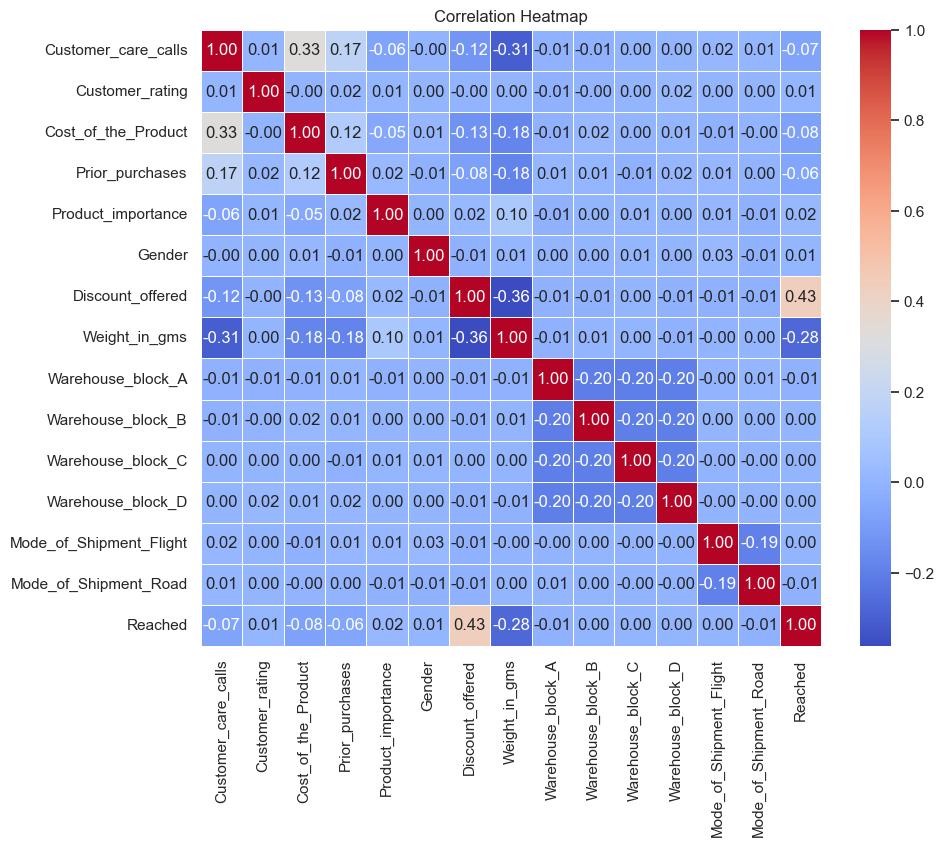

In [36]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [1 / (1 - sm.OLS(y, X[col]).fit().rsquared) for col in X.columns]

# Display the VIF values
vif


,Variable,VIF
0,Customer_care_calls,1.806355
1,Customer_rating,1.702777
2,Cost_of_the_Product,1.849015
3,Prior_purchases,1.670732
4,Product_importance,1.777591
5,Gender,1.334370
6,Discount_offered,1.862721
7,Weight_in_gms,1.478693
8,Warehouse_block_A,1.086191
9,Warehouse_block_B,1.091968


Feature ranking:
1. Weight_in_gms: 0.2825
2. Discount_offered: 0.2429
3. Cost_of_the_Product: 0.1704
4. Prior_purchases: 0.0590
5. Customer_care_calls: 0.0561
6. Customer_rating: 0.0552
7. Product_importance: 0.0307
8. Gender: 0.0211
9. Mode_of_Shipment_Flight: 0.0145
10. Warehouse_block_B: 0.0140
11. Mode_of_Shipment_Road: 0.0138
12. Warehouse_block_C: 0.0134
13. Warehouse_block_A: 0.0133
14. Warehouse_block_D: 0.0131


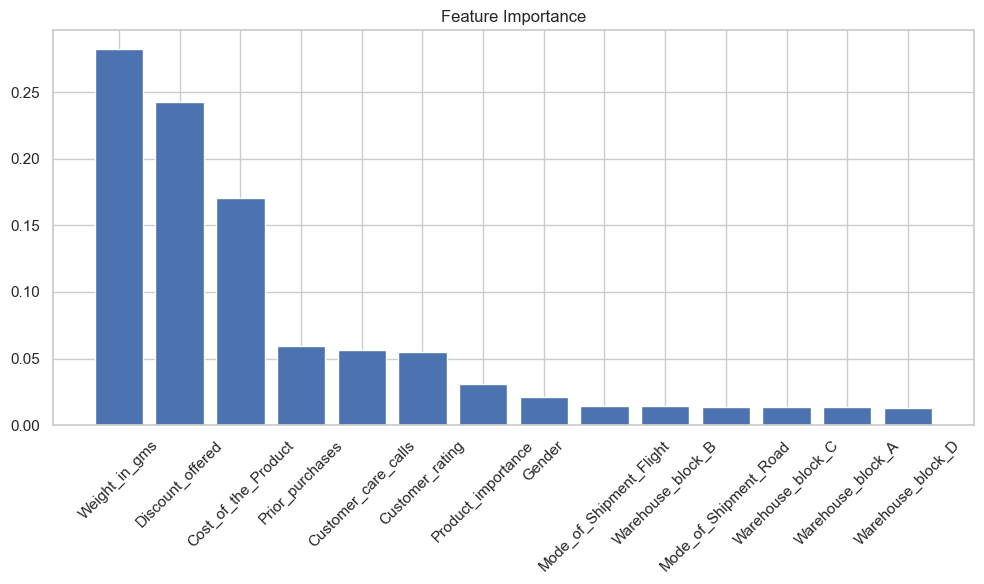

In [38]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names (column names in your dataset)
feature_names = X.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(len(feature_names)):
    print(f"{i + 1}. {feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_names)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=45)
plt.tight_layout()
plt.show()

In [39]:
feature_names

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road'],
      dtype='object')

### Feature Selection

In [43]:
from sklearn.linear_model import LassoCV

def select_features_with_lasso(df, target_column, alpha=.00001):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    lasso = LassoCV(alphas=[alpha], cv=5)
    lasso.fit(X, y)

    feature_importances = lasso.coef_
    feature_mask = np.abs(feature_importances) > 0

    selected_features = X.columns[feature_mask]

    return selected_features

# Example usage:
df = pd.read_csv('../Data/Random_sampled.csv') 
target_column = 'Reached'  
selected_cols = select_features_with_lasso(df, target_column)

print("Selected Features:", selected_cols)


Selected Features: Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road'],
      dtype='object')


In [44]:
df = df[selected_cols]
# df.to_csv('../Data/Encoded_data.csv', index = False)

#### Bringing Data to Normal Distn.

In [3]:
import numpy as np
from scipy import stats

def boxcox_transform_with_constant(data, constant=0.001):
    """
    Apply the Box-Cox transformation to the data with an added constant.

    Parameters:
        data (array-like): The input data to be transformed.
        constant (float): The constant to be added before applying the transformation.

    Returns:
        transformed_data (array-like): The transformed data with the Box-Cox transformation applied.
    """
    
    data_with_constant = data + constant
    transformed_data, _ = stats.boxcox(data_with_constant)

    return transformed_data


df = pd.read_csv('../Data/Random_sampled.csv')
df = boxcox_transform_with_constant(df)
df

ValueError: Data must be 1-dimensional.

#### Handling Outlier

#### Binning
